<a href="https://colab.research.google.com/github/csossa/Origination-Model/blob/f_dae/dae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis exploratorio



In [ ]:
# Revisamos los encabezados de los datos
# ========================================================
datos.head(4)

,#Obligación,Modalidad,Monto,Garantia,Reestructurado,Linea,Forma pago,Plazo,Edad,Género,...,Ingresos mes,Egresos mes,Flujo neto,#Creditos,Escolaridad,Monto sobre ingresos,Cuota,Cuota sobre ingresos,Aportes,Max_mora
0,11-61026,204,58764,S,1,SU,V,1.0,58,M,...,NaN,NaN,NaN,5,U,0.000000,58764,0.000000,NaN,1
1,11-61034,101,5879941,S,1,OR,N,16.0,68,M,...,8743560.0,692161.0,8051399.0,56,E,0.672488,418966,0.047917,8346253.0,1
2,11-61071,219,80100,S,1,SU,V,9.0,66,M,...,NaN,NaN,NaN,27,U,0.000000,8900,0.000000,8348418.0,0
3,11-61121,218,59233567,T,1,SU,N,56.0,59,F,...,9165516.0,632169.0,8533347.0,63,U,6.462655,843940,0.092078,8346241.0,1


In [ ]:
# Tipo de cada columna
# ==============================================================================
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79276 entries, 0 to 79275
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   #Obligación           79276 non-null  object 
 1   Modalidad             79276 non-null  object 
 2   Monto                 79276 non-null  int64  
 3   Garantia              79276 non-null  object 
 4   Reestructurado        79276 non-null  int64  
 5   Linea                 79276 non-null  object 
 6   Forma pago            79276 non-null  object 
 7   Plazo                 71839 non-null  float64
 8   Edad                  79276 non-null  int64  
 9   Género                79276 non-null  object 
 10  Estado civil          79254 non-null  object 
 11  Madre cabeza familia  79276 non-null  object 
 12  Personas a cargo      79276 non-null  int64  
 13  Profesión             79276 non-null  object 
 14  Tipo vivienda         78220 non-null  object 
 15  Estrato            

In [ ]:
# Eliminanos la columna del número de la obligación para analizar los datos
# ==============================================================================
datos =datos.drop("#Obligación", axis=1)

In [ ]:
# Dimensiones del dataset
# ==============================================================================
datos.shape

(79276, 28)

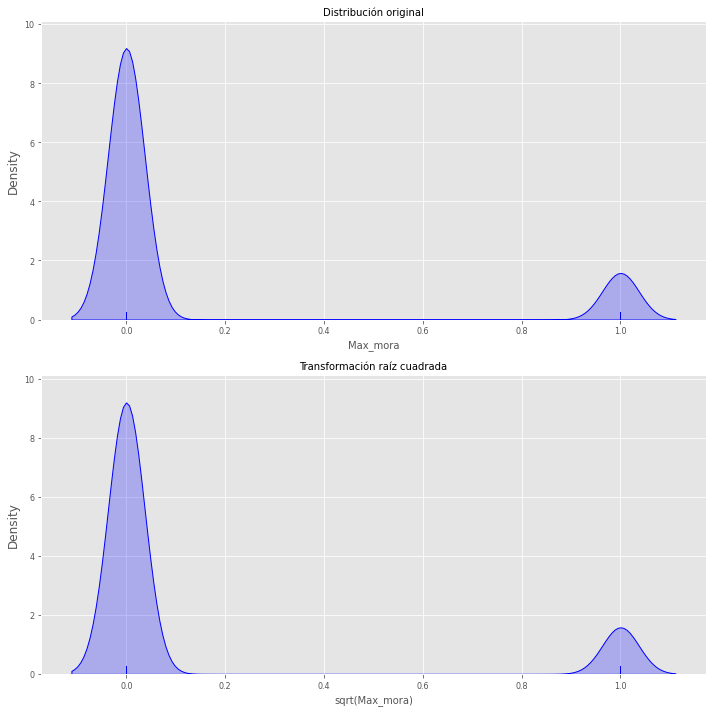

In [ ]:
# Análisis variable respuesta
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
sns.distplot(
    datos.Max_mora,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('Max_mora', fontsize='medium') 
axes[0].tick_params(labelsize = 8)

sns.distplot(
    np.sqrt(datos.Max_mora),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(Max_mora)', fontsize='medium') 
axes[1].tick_params(labelsize = 8)


fig.tight_layout()


In [ ]:
# Identificar cómo se distribuyen mejor los datos
# ==============================================================================
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(datos.Max_mora, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

Fitting 9 distributions: 100%|██████████| 9/9 [00:13<00:00,  1.52s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponpow,4722.512082,483.463433,-223571.611934,inf,0.853491,0.0
gamma,5034.753174,342.980702,-218496.075106,inf,0.853499,0.0
powerlaw,5562.754136,123.220448,-210589.972317,inf,0.853499,0.0
expon,6713.954425,302.445144,-195689.851494,inf,0.853499,0.0
chi2,6809.962721,90.092211,-194552.967694,inf,0.853499,0.0
logistic,7285.280563,298.566684,-189215.551734,inf,0.439065,0.0
norm,7377.106012,146.452457,-188222.582497,inf,0.514173,0.0
beta,7499.233228,4868.213387,-186898.360197,inf,0.889108,0.0
cauchy,7499.233228,9788.043770,-186920.921577,inf,0.496788,0.0


In [ ]:
# Variables numéricas
#=======================================================
datos.select_dtypes(include=['float64', 'int']).describe()

,Monto,Reestructurado,Plazo,Edad,Personas a cargo,Estrato,Sueldo,Ingresos mes,Egresos mes,Flujo neto,#Creditos,Monto sobre ingresos,Cuota,Cuota sobre ingresos,Aportes,Max_mora
count,7.927600e+04,79276.000000,71839.000000,79276.000000,79276.000000,79208.000000,7.346900e+04,4.990000e+04,4.050000e+04,4.990000e+04,79276.000000,79276.000000,7.927600e+04,79276.000000,5.963000e+04,79276.000000
mean,5.776476e+06,2.024320,8.911998,64.433221,0.128904,4.013597,6.464598e+06,1.010465e+07,3.008698e+06,7.662724e+06,84.411941,0.560524,7.399213e+05,0.076867,8.787595e+06,0.146501
std,3.217477e+07,14.677731,38.227554,12.249964,0.509236,0.531702,6.959206e+06,1.133649e+07,7.385453e+06,9.942201e+06,120.267643,5.182495,8.290790e+06,2.762405,4.154843e+06,0.353610
min,1.000000e+00,1.000000,1.000000,14.000000,0.000000,1.000000,5.000000e+05,8.000000e+05,4.000000e+04,-1.015333e+08,1.000000,0.000000,1.000000e+00,0.000000,4.120100e+04,0.000000
25%,3.024000e+04,1.000000,1.000000,57.000000,0.000000,4.000000,3.200000e+06,5.650000e+06,5.492270e+05,3.840529e+06,25.000000,0.000000,2.560000e+04,0.000000,5.985920e+06,0.000000
50%,3.427200e+05,1.000000,5.000000,64.000000,0.000000,4.000000,5.359012e+06,8.253412e+06,1.179116e+06,6.228126e+06,50.000000,0.003703,6.586550e+04,0.002806,8.148633e+06,0.000000
75%,1.320736e+06,1.000000,10.000000,73.000000,0.000000,4.000000,8.302542e+06,1.199365e+07,3.494000e+06,9.400000e+06,103.000000,0.087429,2.020000e+05,0.013668,1.050161e+07,0.000000
max,2.300000e+09,1948.000000,9391.000000,122.000000,4.000000,6.000000,3.000000e+08,5.469592e+08,2.386155e+08,4.800000e+08,916.000000,704.000000,8.626209e+08,741.278014,1.891911e+07,1.000000


In [ ]:
# Número de datos ausentes por variable
# ==============================================================================
datos.isna().sum().sort_values()

Modalidad                   0
Cuota sobre ingresos        0
Cuota                       0
Monto sobre ingresos        0
#Creditos                   0
Profesión                   0
Personas a cargo            0
Madre cabeza familia        0
Max_mora                    0
Edad                        0
Monto                       0
Forma pago                  0
Garantia                    0
Reestructurado              0
Género                      0
Linea                       0
Estado civil               22
Escolaridad                40
Estrato                    68
Ocupación                 128
Tipo vivienda            1056
Tipo contrato            1293
Sueldo                   5807
Plazo                    7437
Aportes                 19646
Flujo neto              29376
Ingresos mes            29376
Egresos mes             38776
dtype: int64

In [ ]:
datos.isna().sum()/datos.shape[0]*100

Modalidad                0.000000
Monto                    0.000000
Garantia                 0.000000
Reestructurado           0.000000
Linea                    0.000000
Forma pago               0.000000
Plazo                    9.381149
Edad                     0.000000
Género                   0.000000
Estado civil             0.027751
Madre cabeza familia     0.000000
Personas a cargo         0.000000
Profesión                0.000000
Tipo vivienda            1.332055
Estrato                  0.085776
Ocupación                0.161461
Tipo contrato            1.631011
Sueldo                   7.325042
Ingresos mes            37.055351
Egresos mes             48.912660
Flujo neto              37.055351
#Creditos                0.000000
Escolaridad              0.050457
Monto sobre ingresos     0.000000
Cuota                    0.000000
Cuota sobre ingresos     0.000000
Aportes                 24.781775
Max_mora                 0.000000
dtype: float64

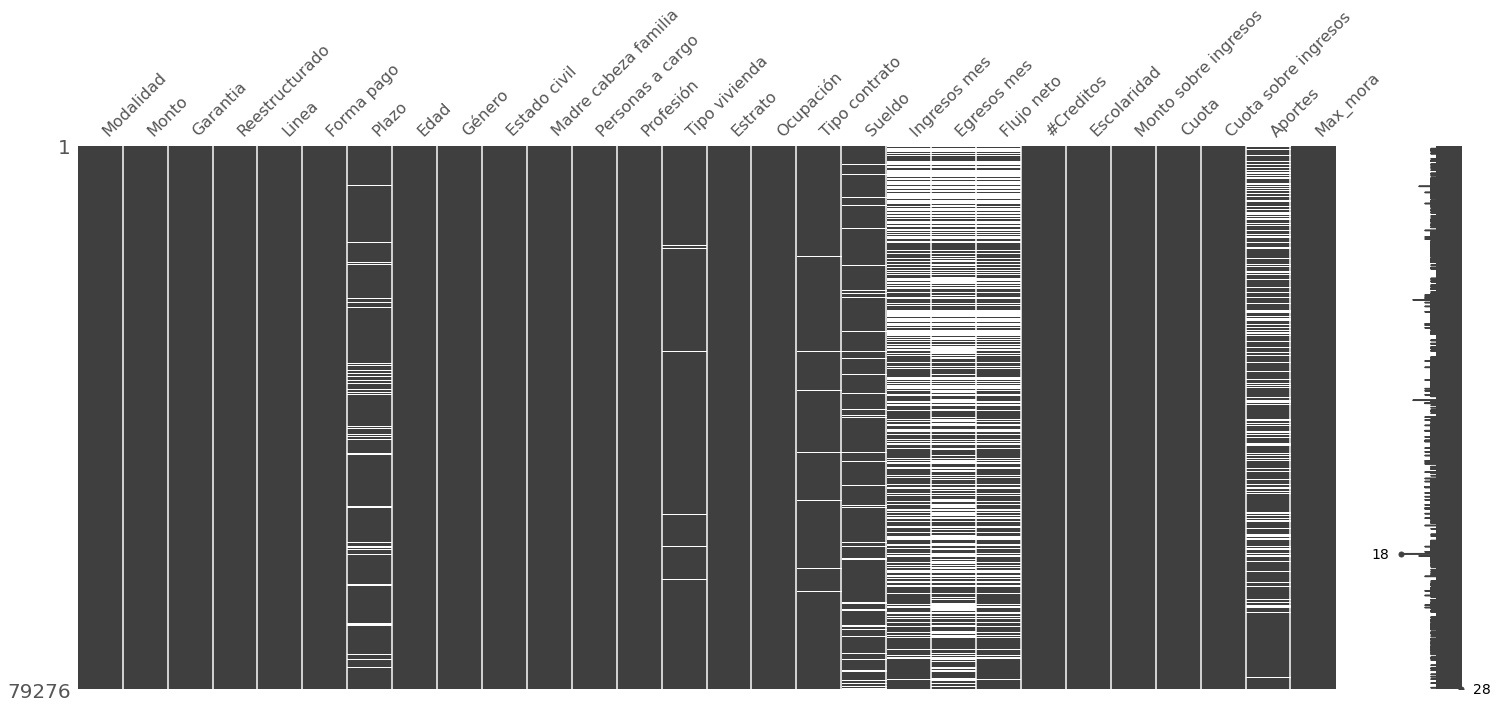

In [ ]:
# Análisis calidad de las variables
#=============================================
msno.matrix(datos)

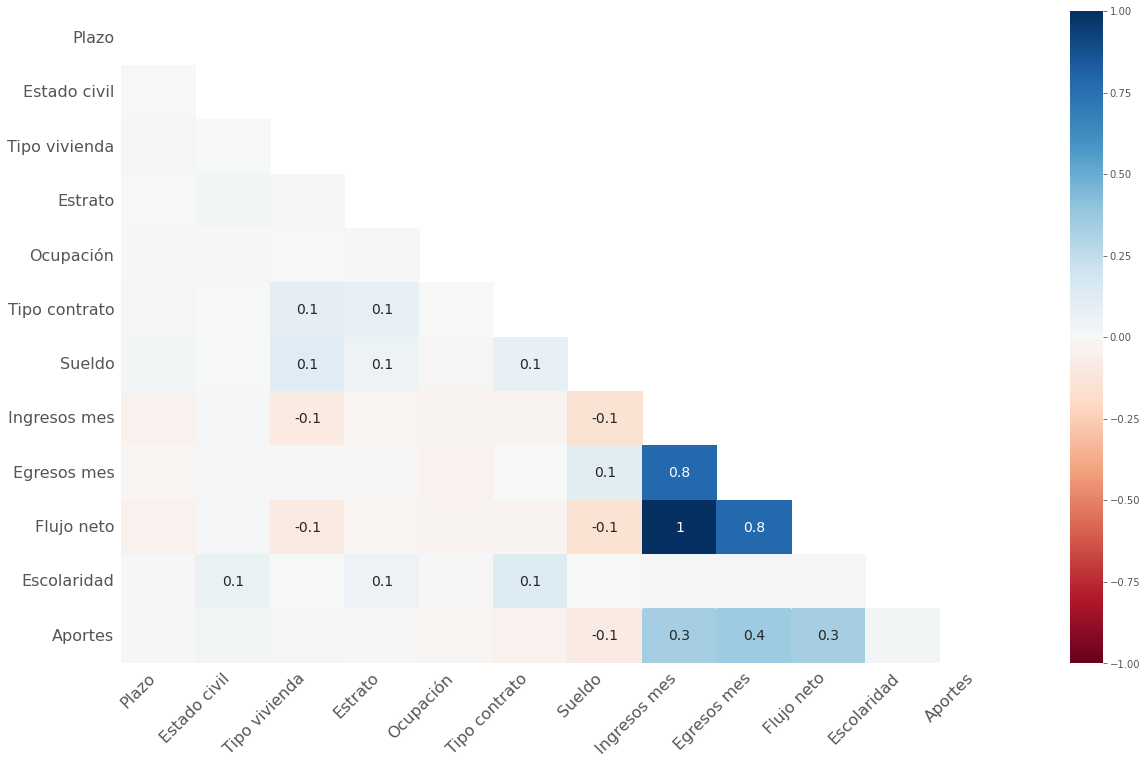

In [ ]:
# heatmap missing
#===========================================
msno.heatmap(datos)

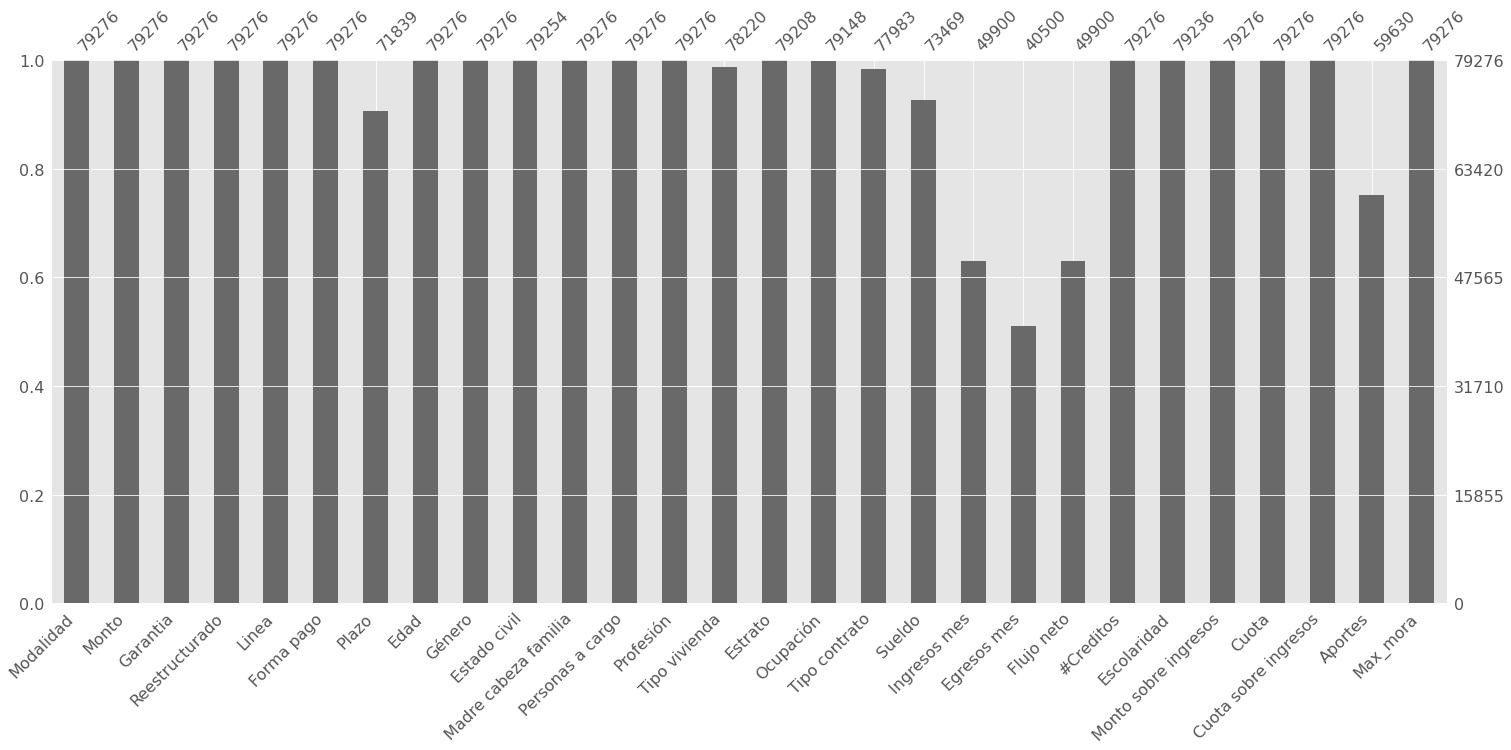

In [ ]:
# Análisis calidad de las variables
#=============================================
msno.bar(datos)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb886b216a0>,
      dtype=object)

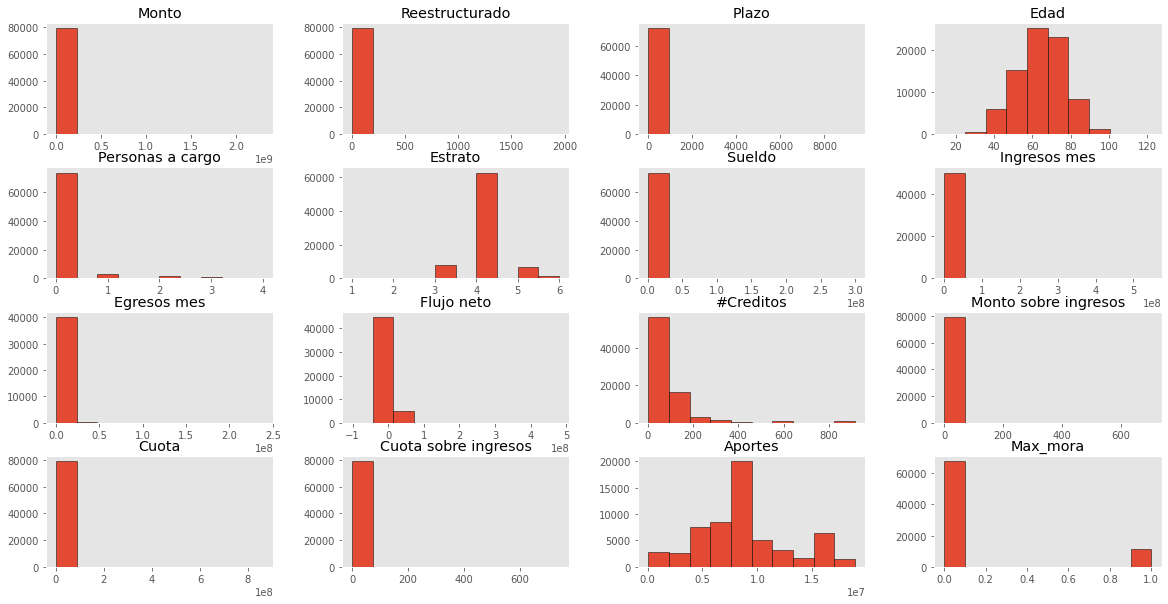

In [ ]:
datos.hist(grid=False, edgecolor='black', figsize=(20,10))

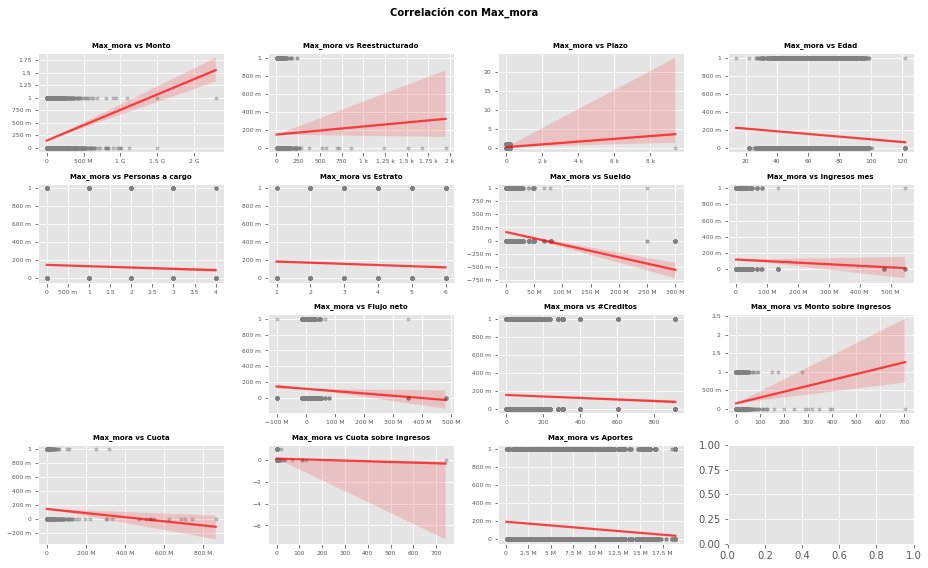

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(13, 8))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Max_mora')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = datos[colum],
        y           = datos['Max_mora'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"Max_mora vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con Max_mora', fontsize = 10, fontweight = "bold");

In [ ]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
151,Flujo neto,Ingresos mes,0.806096,0.806096
121,Ingresos mes,Flujo neto,0.806096,0.806096
103,Sueldo,Ingresos mes,0.769116,0.769116
118,Ingresos mes,Sueldo,0.769116,0.769116
150,Flujo neto,Sueldo,0.614156,0.614156
105,Sueldo,Flujo neto,0.614156,0.614156
120,Ingresos mes,Egresos mes,0.595415,0.595415
135,Egresos mes,Ingresos mes,0.595415,0.595415
189,Monto sobre ingresos,Cuota sobre ingresos,0.525215,0.525215
219,Cuota sobre ingresos,Monto sobre ingresos,0.525215,0.525215


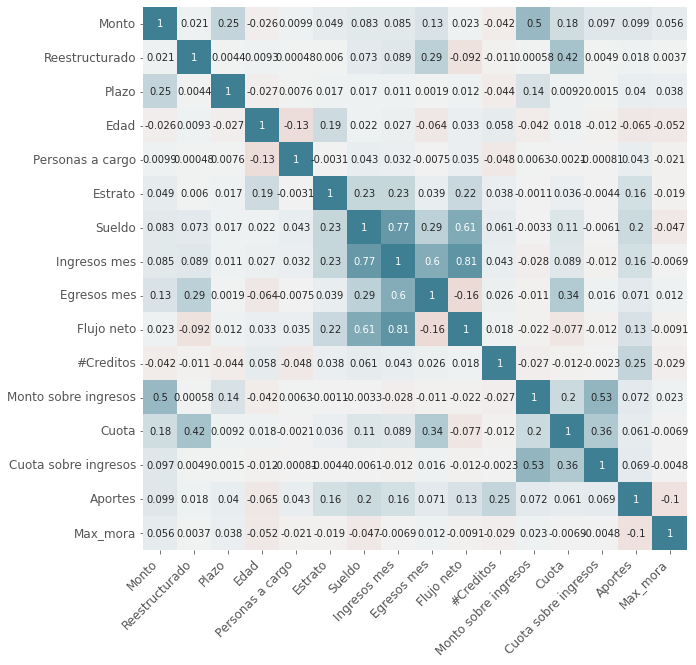

In [ ]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 12)

In [ ]:
# Variables cualitativas (tipo object)
# ==============================================================================
datos.select_dtypes(include=['object']).describe()

,Modalidad,Garantia,Linea,Forma pago,Género,Estado civil,Madre cabeza familia,Profesión,Tipo vivienda,Ocupación,Tipo contrato,Escolaridad
count,79276,79276,79276,79276,79276,79254,79276,79276,78220,79148,77983,79236
unique,118,4,9,2,2,7,2,90,5,10,8,8
top,204,P,SE,V,M,C,N,121,P,Pensionado,Término Indefinido,E
freq,17050,72691,35124,76924,47798,48181,77348,7703,56837,42753,76533,27730


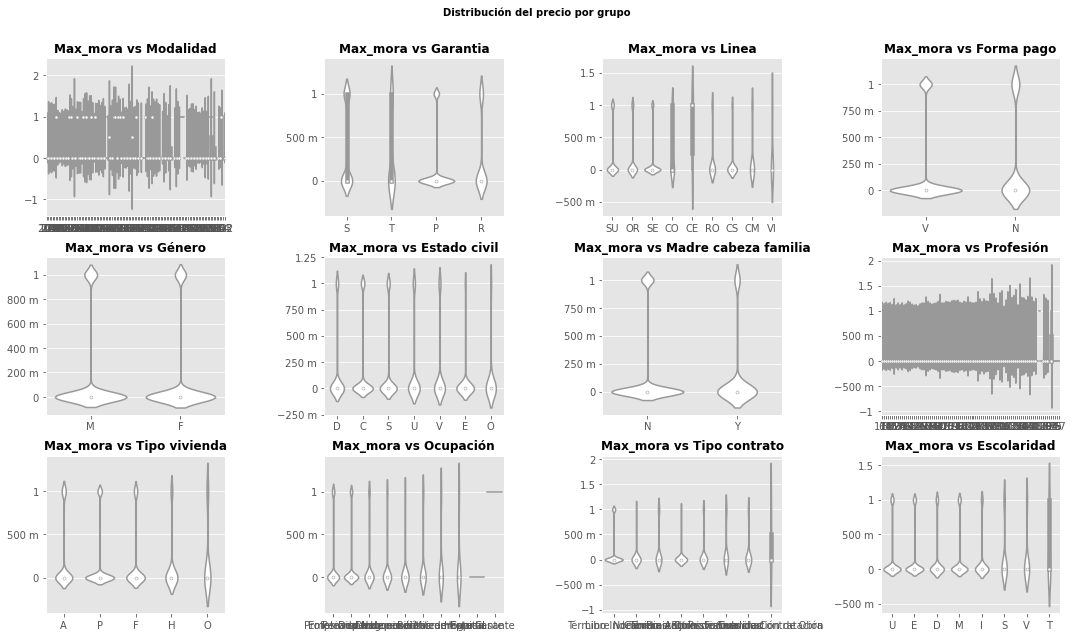

In [ ]:
# Gráfico relación entre Max_mora y cada cada variables cualitativas
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 9))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'Max_mora',
        data  = datos,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"Max_mora vs {colum}", fontsize = 12, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución del precio por grupo', fontsize = 10, fontweight = "bold");